## Building a Perceptron

**0) Loading and Preparing Data**

Importing libraries:

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets

<br>

Importing the dataset

In [6]:
import os

# Path to your directory of npy matrices
matrix_dir = "sampled_files"

# List only .npy files
sampled_files = sorted([
    f for f in os.listdir(matrix_dir)
    if f.endswith(".npy")
])

print("Found", len(sampled_files), "files:\n")
for i, name in enumerate(sampled_files):
    print(f"{i+1:2d}: {name}")


Found 50 files:

 1: H_H S11 EO_seg_90_GCmatrix.npy
 2: H_H S13 EC_seg_96_GCmatrix.npy
 3: H_H S15 EC_seg_64_GCmatrix.npy
 4: H_H S17 EC_seg_148_GCmatrix.npy
 5: H_H S17 EO_seg_103_GCmatrix.npy
 6: H_H S2 EC_seg_217_GCmatrix.npy
 7: H_H S2 EC_seg_250_GCmatrix.npy
 8: H_H S20 EO_seg_210_GCmatrix.npy
 9: H_H S22 EC_seg_281_GCmatrix.npy
10: H_H S22 EO_seg_267_GCmatrix.npy
11: H_H S23 EC_seg_103_GCmatrix.npy
12: H_H S27 EC_seg_152_GCmatrix.npy
13: H_H S27 EC_seg_51_GCmatrix.npy
14: H_H S30 EC_seg_148_GCmatrix.npy
15: H_H S30 EO_seg_290_GCmatrix.npy
16: H_H S4 EO_seg_67_GCmatrix.npy
17: H_H S5 EC_seg_257_GCmatrix.npy
18: H_H S6 EC_seg_69_GCmatrix.npy
19: H_H S6 EO_seg_106_GCmatrix.npy
20: H_H S6 EO_seg_151_GCmatrix.npy
21: H_H S9 EO_seg_173_GCmatrix.npy
22: MDD_MDD S10 EC_seg_276_GCmatrix.npy
23: MDD_MDD S13 EO_seg_236_GCmatrix.npy
24: MDD_MDD S14 EC_seg_146_GCmatrix.npy
25: MDD_MDD S14 EO_seg_248_GCmatrix.npy
26: MDD_MDD S14 EO_seg_281_GCmatrix.npy
27: MDD_MDD S17 EC_seg_89_GCmatrix.npy
28

Matrix shape: (19, 19)


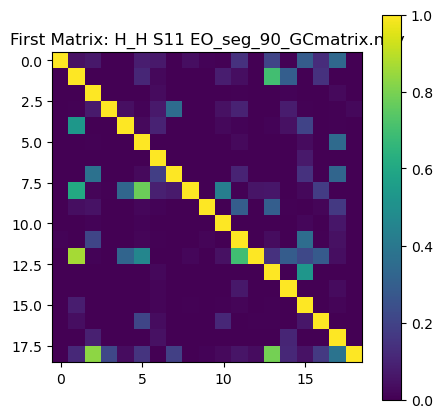

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the first .npy file
first_path = os.path.join(matrix_dir, sampled_files[0])
M = np.load(first_path)

print("Matrix shape:", M.shape)

# Plot as a 19x19 heatmap
plt.figure(figsize=(5,5))
plt.imshow(M, cmap="viridis")
plt.colorbar()
plt.title(f"First Matrix: {sampled_files[0]}")
plt.show()


We want to start with two classes only: Setosa and "not Setosa"...

In [3]:
mult  = [50,50,50]

Target = []
for n, m in zip(names, mult):
    Target.extend([n] * m)

indices = [i for i, x in enumerate(Target) if x == 'setosa']

Targetnum          = iris.target*0
Targetnum[indices] = 1

...and also with two features:

In [7]:
X    = iris.data
X2D  = X[:,1:3]

In [9]:
print(X2D)

[[3.5 1.4]
 [3.  1.4]
 [3.2 1.3]
 [3.1 1.5]
 [3.6 1.4]
 [3.9 1.7]
 [3.4 1.4]
 [3.4 1.5]
 [2.9 1.4]
 [3.1 1.5]
 [3.7 1.5]
 [3.4 1.6]
 [3.  1.4]
 [3.  1.1]
 [4.  1.2]
 [4.4 1.5]
 [3.9 1.3]
 [3.5 1.4]
 [3.8 1.7]
 [3.8 1.5]
 [3.4 1.7]
 [3.7 1.5]
 [3.6 1. ]
 [3.3 1.7]
 [3.4 1.9]
 [3.  1.6]
 [3.4 1.6]
 [3.5 1.5]
 [3.4 1.4]
 [3.2 1.6]
 [3.1 1.6]
 [3.4 1.5]
 [4.1 1.5]
 [4.2 1.4]
 [3.1 1.5]
 [3.2 1.2]
 [3.5 1.3]
 [3.6 1.4]
 [3.  1.3]
 [3.4 1.5]
 [3.5 1.3]
 [2.3 1.3]
 [3.2 1.3]
 [3.5 1.6]
 [3.8 1.9]
 [3.  1.4]
 [3.8 1.6]
 [3.2 1.4]
 [3.7 1.5]
 [3.3 1.4]
 [3.2 4.7]
 [3.2 4.5]
 [3.1 4.9]
 [2.3 4. ]
 [2.8 4.6]
 [2.8 4.5]
 [3.3 4.7]
 [2.4 3.3]
 [2.9 4.6]
 [2.7 3.9]
 [2.  3.5]
 [3.  4.2]
 [2.2 4. ]
 [2.9 4.7]
 [2.9 3.6]
 [3.1 4.4]
 [3.  4.5]
 [2.7 4.1]
 [2.2 4.5]
 [2.5 3.9]
 [3.2 4.8]
 [2.8 4. ]
 [2.5 4.9]
 [2.8 4.7]
 [2.9 4.3]
 [3.  4.4]
 [2.8 4.8]
 [3.  5. ]
 [2.9 4.5]
 [2.6 3.5]
 [2.4 3.8]
 [2.4 3.7]
 [2.7 3.9]
 [2.7 5.1]
 [3.  4.5]
 [3.4 4.5]
 [3.1 4.7]
 [2.3 4.4]
 [3.  4.1]
 [2.5 4. ]
 [2.6 4.4]

In [ ]:
print(X)

In [ ]:
print(Target)

In [ ]:
print(Targetnum)

In [23]:
#Try out this later. What is going to happen and why?
Targetnum = iris.target

<br>

**1) Building the Neuron/Perceptron**

In [11]:
#import numpy as np

def Neuron1(Data, Target, alpha = 0.01):
    
#Data   :          the input matrix
#Target :          the target vector t for E = 0.5*(t - y)**2
#alpha  :          learning rate    

    if len(Target.shape) == 1:
        Target = Target.reshape(len(Target), 1)

    [rows, cols] = Data.shape
 
    N = rows #N: Number of observations
    I = cols #I: Number of input channels

    #initializing weights incl bias:
    W     = np.random.normal(0, 1, (I + 1, 1))

    #adding bias column (see slides)
    bias  = np.ones((N,1))
    Input = np.hstack((Data, bias))

    #calculating prediction
    net   = np.dot(Input, W)    #net output
    Y     = 1/(1 + np.exp(-net))#activation here: sigmoid

    #target vs output
    Error  = Target - Y
    
    #backpropagation
    dY     = Y*(1 - Y)
    dE     = Error
    
    W[:-1] = W[:-1] - alpha*np.dot(-Input[:,:-1].transpose(), dY*dE) #for weights
    W[-1]  = W[-1]  - alpha*np.dot(-dY.transpose(), dE)              #for bias

    return W

<br>

Let us run the neuron for X and X2D and check the weights

In [13]:
W = Neuron1(X2D, Targetnum)
print(W) 

[[-0.57261727]
 [-0.13959516]
 [-2.02797598]]


In [ ]:
W = Neuron1(X, Targetnum)
print(W) 

<br>

Now we want to see, if the weights converge and the error reduces if we run the code for many iterations. First we need to set the number of iterations as an input argument and then run a *for* loop within the neuron. Next, we add a plotting part at the end of the function to illustrate the changes of the weights, the bias and the error, hence the learning process.

In [25]:
#import numpy as np
#import matplotlib.pyplot as plt

def Neuron2(Niter, Data, Target, alpha = 0.01):

#Niter  :          number of iterations    
#Data   :          the input matrix
#Target :          the target vector t for E = 0.5*(t - y)**2
#alpha  :          learning rate   

    if len(Target.shape) == 1:
        Target = Target.reshape(len(Target),1)
        
    [rows, cols] = Data.shape
 
    N = rows #N: Number of observations
    I = cols #I: Number of input channels

    #initializing weights incl bias:
    W     = np.random.normal(-1,1,(I + 1,1))

    #adding bias column (see slides)
    bias  = np.ones((N,1))
    Input = np.hstack((Data, bias))

    MSE   = np.zeros((Niter,1))    #monitoring E
    Wei   = np.zeros((Niter,I + 1))#monitoring weights and bias

    for n in range(Niter):

        #calculating prediction
        net   = np.dot(Input, W)    #net output
        Y     = 1/(1 + np.exp(-net))#activation here: sigmoid
    
        #target vs output
        Error  = Target - Y
        
        #backpropagation
        dY     = Y*(1 - Y)
        dE     = Error
        
        W[:-1] = W[:-1] - alpha*np.dot(-Input[:,:-1].transpose(), dY*dE) #for weights
        W[-1]  = W[-1]  - alpha*np.dot(-dY.transpose(), dE)              #for bias

        #saving results    
        MSE[n]   = sum(Error**2)/N
        Wei[n,:] = W.transpose()

    
########plotting#################################################################

    fig, axs = plt.subplots(3, 1)
    axs[0].plot(range(Niter), MSE, c = 'black', linewidth = 3)
    axs[0].set_title('MSE')
    axs[0].set_xlabel('iteration')
    axs[0].set_yscale('log')
    axs[1].plot(range(Niter), Wei, linewidth = 3)
    axs[1].set_title('weights')
    axs[1].set_xlabel('iteration')
    axs[2].stairs(Target[:,0], color = 'k', label = 'target')
    axs[2].stairs(Y[:,0], label = 'prediction', linewidth = 3)
    axs[2].set_ylabel('class')
    axs[2].legend()
    fig.tight_layout(pad = 1.0)
    plt.show()
    


    return Wei

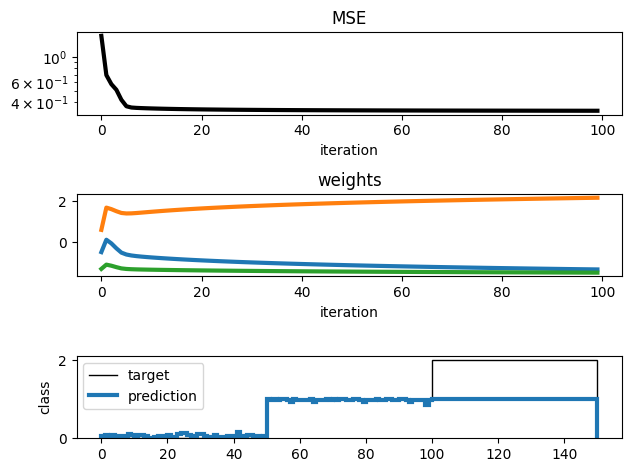

In [27]:
Wei = Neuron2(100, X2D, Targetnum) 

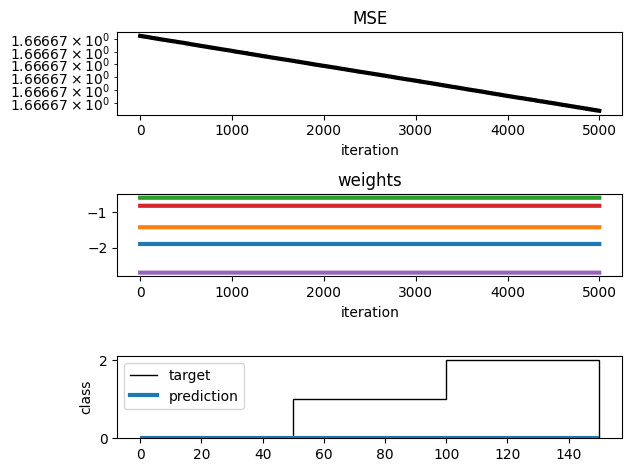

In [33]:
Wei = Neuron2(5000, X, Targetnum)

We see that for most runs, the error reduces and the weights converge. But in some cases the neuron doesn't seem to find a good minimum. This is because we neither have implemented an adaptive learning rate, nor a momentum or any regularization.

<br>

We still want to understand the learning process in more detail. Run the function NeuronContour.py for different numbers of iterations and explore how the threshold emerges.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def NeuronContour(Niter, Data, Target, alpha = 0.01):

#Niter  :          number of iterations    
#Data   :          the input matrix
#Target :          the target vector t for E = 0.5*(t - y)**2
#alpha  :          learning rate

    #creating meshgrid through the data range for illustration
    Ngrid = 100

    x1 = np.linspace(Data[:,0].min(), Data[:,0].max(), Ngrid)
    x2 = np.linspace(Data[:,1].min(), Data[:,1].max(), Ngrid)
    
    [xx1, xx2] = np.meshgrid(x1, x2)


    if len(Target.shape) == 1:
        Target = Target.reshape(len(Target),1)
        
    [rows, cols] = Data.shape
 
    N = rows #N: Number of observations
    I = cols #I: Number of input channels

    #initializing weights incl bias:
    W     = np.random.normal(-1,1,(I + 1,1))

    #adding bias column (see slides)
    bias  = np.ones((N,1))
    Input = np.hstack((Data, bias))


    for n in range(Niter):

        #calculating prediction
        net   = np.dot(Input, W)    #net output
        Y     = 1/(1 + np.exp(-net))#activation here: sigmoid
    
        #target vs output
        Error     = Target - Y
        
        #backpropagation
        dY     = Y*(1 - Y)
        dE     = Error
        
        W[:-1] = W[:-1] - alpha*np.dot(-Input[:,:-1].transpose(), dY*dE) #for weights
        W[-1]  = W[-1]  - alpha*np.dot(-dY.transpose(), dE)              #for bias



    
########plotting#################################################################
    XY        = np.c_[xx1.ravel(), xx2.ravel()]
    L         = XY.shape[0]
    Inputcont = np.hstack((XY, np.ones((L,1))))
    netcont   = np.dot(Inputcont, W)
    Ycont     = 1/(1 + np.exp(-netcont))
    Ycont     = Ycont[:,0:2].reshape(Ngrid,Ngrid)
    Y         = np.round(Y)
    
    IdxTrue0 = np.argwhere(Target == 0)
    IdxTrue1 = np.argwhere(Target == 1)
    
    IdxPred0 = np.argwhere(Y == 0)
    IdxPred1 = np.argwhere(Y == 1)

    CM = "Blues"
    
    plt.contourf(xx1, xx2, Ycont, cmap = CM, alpha = 0.3, levels = 100)
    plt.scatter(Data[IdxTrue0, 0], Data[IdxTrue0, 1], color = [255/256,69/256,0], marker = '.', label = 'actual class 0')
    plt.scatter(Data[IdxTrue1, 0], Data[IdxTrue1, 1], color = [46/256,139/256,87/256], marker = '.', label = 'actual class 1')
    plt.scatter(Data[IdxPred0, 0], Data[IdxPred0, 1], edgecolors = [255/256,69/256,0], marker = 'o', facecolors = 'none', label = 'prediced class 0')
    plt.scatter(Data[IdxPred1, 0], Data[IdxPred1, 1], edgecolors = [46/256,139/256,87/256], marker = 'o', facecolors = 'none', label = 'prediced class 1')
    plt.legend()
    plt.show()

<br>

In [ ]:
NeuronContour(3, X2D, Targetnum)

In [ ]:
NeuronContour(10, X2D, Targetnum)

In [ ]:
NeuronContour(100, X2D, Targetnum)

In [ ]:
NeuronContour(10000, X2D, Targetnum)